In [94]:
% matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import seaborn as sns

movies = pd.read_csv('../data/ml-20m/movies.csv').sample(1000)
embeddings = torch.load('../data/movie_emb.pt')

In [95]:
from tqdm import tqdm_notebook as tqdm
import pickle

with open( "../data/id_to_index.p", "rb") as f:
    id_to_index = pickle.load(f)

ids = movies['movieId'].tolist()

In [96]:
m_embed = torch.stack([embeddings[[id_to_index[i]]] for i in ids]).numpy()

In [114]:
m_cat = movies['title'].tolist()

In [98]:
no_cat = len(set(m_cat))
cat_list = list(set(m_cat))

In [99]:
m_embed = np.squeeze(m_embed)
m_embed.shape

(1000, 768)

In [110]:
def tsne_plot(tokens, labels):
    "Creates and TSNE model and plots it"
    
    tsne_model = TSNE(perplexity=100, n_components=2, init='pca', n_iter=5000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    data = pd.DataFrame({'x' : x, 'y': y, 'label': [m_cat[i] for i in range(len(x))]})
    
        
    sns.lmplot(x="x", y="y", data=data, fit_reg=False, hue='label', legend=False, height=12)
    plt.legend(loc='upper right')

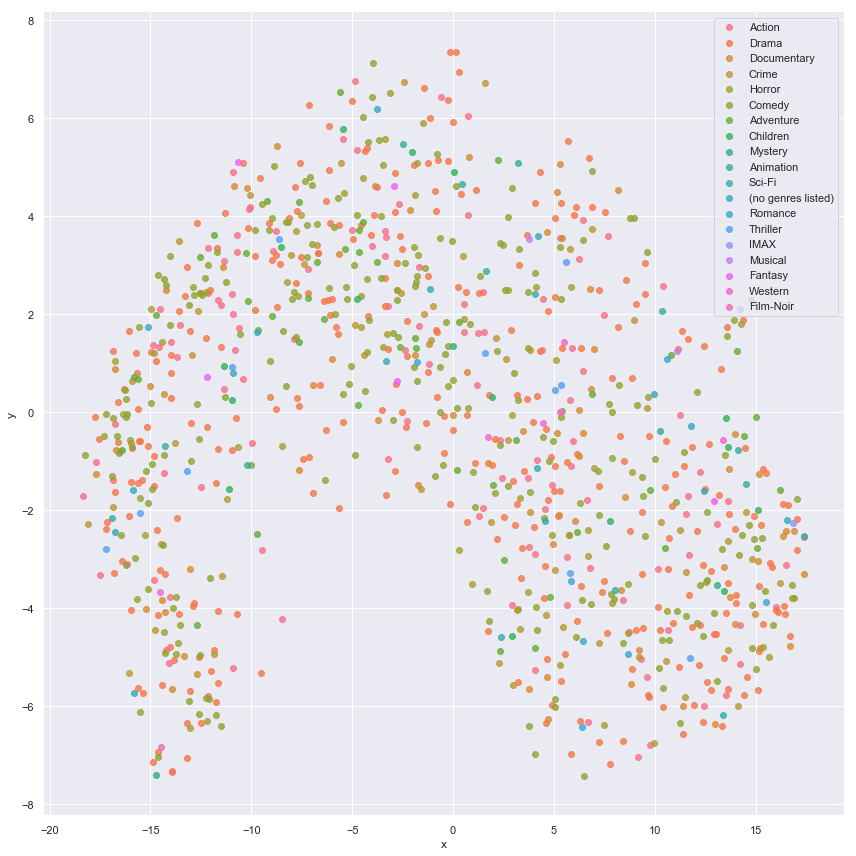

In [111]:
tsne_plot(m_embed, m_cat)

In [113]:
print(cat_list)

['Sci-Fi', 'Horror', 'Comedy', 'Mystery', 'Musical', '(no genres listed)', 'Documentary', 'Crime', 'Romance', 'Animation', 'Adventure', 'Western', 'IMAX', 'Drama', 'Thriller', 'Action', 'Fantasy', 'Film-Noir', 'Children']
